                                       Assignment 3

In [2]:
import os
import warnings 
warnings.filterwarnings("ignore")
grocery_path = r'Grocery_Items_10.csv'

import pandas as pd
grocery_data= pd.read_csv(grocery_path)
groceries_list= [line.dropna().tolist() for idx, line in grocery_data.iterrows()]

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
final_groceries_df = pd.DataFrame(te_ary, columns=te.columns_)

final_groceries_df.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### min_sup = 0.01 and min_conf  0.1

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules
def gen_assoc_rules(df,i,j):
    frequent_items = apriori(df, min_support=i, use_colnames=True)
    ar=association_rules(frequent_items, metric="confidence", min_threshold=j)
    return ar
gen_assoc_rules(final_groceries_df,0.01,0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.157500,0.11975,0.016000,0.101587,0.848328,-0.002861,0.979784
1,(other vegetables),(whole milk),0.119750,0.15750,0.016000,0.133612,0.848328,-0.002861,0.972428
2,(rolls/buns),(whole milk),0.111625,0.15750,0.014375,0.128779,0.817647,-0.003206,0.967034
3,(soda),(whole milk),0.098625,0.15750,0.012125,0.122940,0.780574,-0.003408,0.960596
4,(yogurt),(whole milk),0.088750,0.15750,0.012125,0.136620,0.867427,-0.001853,0.975816


####  (msv): 0.001, 0.005, 0.01 and (mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules 

<AxesSubplot:xlabel='msv', ylabel='mct'>

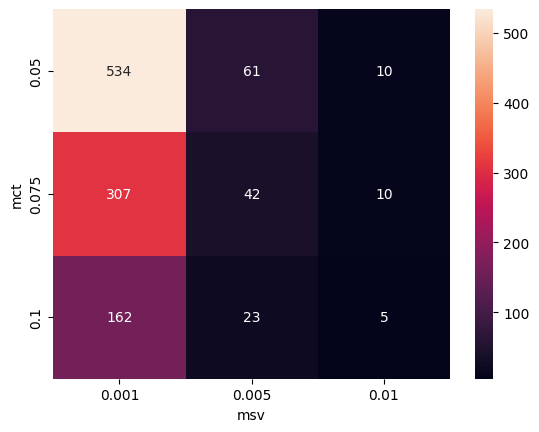

In [7]:
import seaborn as sns
msv =[0.001,0.005,0.01]
mct =[0.05,0.075,0.1]

pair_df = pd.DataFrame(columns=['msv', 'mct', 'count'])
for i in msv:
    for j in mct:
        pair_df = pair_df.append({'msv': i, 'mct': j, 'count': len(gen_assoc_rules(final_groceries_df,i,j))}, ignore_index=True)
heatmap = pair_df.pivot("mct", "msv", "count")
sns.heatmap(heatmap,annot=True,fmt=".0f")

#### Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset  for minimum support = 0.005 and minimum confident threshold = 0.075. 

In [8]:
subset1 = final_groceries_df.iloc[:len(final_groceries_df)//2]
subset2 = final_groceries_df.iloc[len(final_groceries_df)//2:]

In [9]:
gen_assoc_rules(subset1,0.005,0.075)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(whole milk),0.02900,0.15925,0.00500,0.172414,1.082661,0.000382,1.015906
1,(bottled beer),(whole milk),0.03900,0.15925,0.00825,0.211538,1.328342,0.002039,1.066317
2,(bottled water),(whole milk),0.05950,0.15925,0.00600,0.100840,0.633220,-0.003475,0.935040
3,(brown bread),(whole milk),0.04025,0.15925,0.00500,0.124224,0.780054,-0.001410,0.960005
4,(citrus fruit),(other vegetables),0.05625,0.12025,0.00525,0.093333,0.776161,-0.001514,0.970313
5,(citrus fruit),(whole milk),0.05625,0.15925,0.00800,0.142222,0.893075,-0.000958,0.980149
6,(citrus fruit),(yogurt),0.05625,0.08400,0.00525,0.093333,1.111111,0.000525,1.010294
7,(domestic eggs),(whole milk),0.03725,0.15925,0.00550,0.147651,0.927165,-0.000432,0.986392
8,(newspapers),(whole milk),0.03625,0.15925,0.00500,0.137931,0.866129,-0.000773,0.975270
9,(rolls/buns),(other vegetables),0.10725,0.12025,0.01025,0.095571,0.794770,-0.002647,0.972713


In [10]:
gen_assoc_rules(subset2,0.005,0.075)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.04525,0.15575,0.00800,0.176796,1.135124,0.000952,1.025565
1,(bottled water),(other vegetables),0.05725,0.11925,0.00525,0.091703,0.768998,-0.001577,0.969672
2,(bottled water),(rolls/buns),0.05725,0.11600,0.00650,0.113537,0.978768,-0.000141,0.997222
3,(bottled water),(soda),0.05725,0.09900,0.00600,0.104803,1.058621,0.000332,1.006483
4,(bottled water),(whole milk),0.05725,0.15575,0.00900,0.157205,1.009343,0.000083,1.001727
5,(butter),(whole milk),0.03675,0.15575,0.00575,0.156463,1.004575,0.000026,1.000845
6,(canned beer),(whole milk),0.04800,0.15575,0.00800,0.166667,1.070091,0.000524,1.013100
7,(citrus fruit),(other vegetables),0.05225,0.11925,0.00525,0.100478,0.842587,-0.000981,0.979132
8,(citrus fruit),(whole milk),0.05225,0.15575,0.00725,0.138756,0.890889,-0.000888,0.980268
9,(citrus fruit),(yogurt),0.05225,0.09350,0.00525,0.100478,1.074636,0.000365,1.007758


In [11]:
pd.merge(gen_assoc_rules(subset1,0.005,0.075), gen_assoc_rules(subset2,0.005,0.075),on=['antecedents', 'consequents'])


,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y
0,(bottled beer),(whole milk),0.03900,0.15925,0.00825,0.211538,1.328342,0.002039,1.066317,0.04525,0.15575,0.00800,0.176796,1.135124,0.000952,1.025565
1,(bottled water),(whole milk),0.05950,0.15925,0.00600,0.100840,0.633220,-0.003475,0.935040,0.05725,0.15575,0.00900,0.157205,1.009343,0.000083,1.001727
2,(citrus fruit),(other vegetables),0.05625,0.12025,0.00525,0.093333,0.776161,-0.001514,0.970313,0.05225,0.11925,0.00525,0.100478,0.842587,-0.000981,0.979132
3,(citrus fruit),(whole milk),0.05625,0.15925,0.00800,0.142222,0.893075,-0.000958,0.980149,0.05225,0.15575,0.00725,0.138756,0.890889,-0.000888,0.980268
4,(citrus fruit),(yogurt),0.05625,0.08400,0.00525,0.093333,1.111111,0.000525,1.010294,0.05225,0.09350,0.00525,0.100478,1.074636,0.000365,1.007758
5,(domestic eggs),(whole milk),0.03725,0.15925,0.00550,0.147651,0.927165,-0.000432,0.986392,0.03675,0.15575,0.00575,0.156463,1.004575,0.000026,1.000845
6,(newspapers),(whole milk),0.03625,0.15925,0.00500,0.137931,0.866129,-0.000773,0.975270,0.03800,0.15575,0.00625,0.164474,1.056011,0.000332,1.010441
7,(rolls/buns),(other vegetables),0.10725,0.12025,0.01025,0.095571,0.794770,-0.002647,0.972713,0.11600,0.11925,0.01125,0.096983,0.813273,-0.002583,0.975341
8,(other vegetables),(rolls/buns),0.12025,0.10725,0.01025,0.085239,0.794770,-0.002647,0.975938,0.11925,0.11600,0.01125,0.094340,0.813273,-0.002583,0.976083
9,(sausage),(other vegetables),0.05725,0.12025,0.00700,0.122271,1.016805,0.000116,1.002302,0.06100,0.11925,0.00550,0.090164,0.756092,-0.001774,0.968032


#### Image processing, getting images and labels

In [20]:
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dog_images=r'output folder'

hist_images = []
labels = []
for index,breed in enumerate(os.listdir(dog_images)):
    image_folder=os.path.join(dog_images,breed)
    images=glob(os.path.join(image_folder, '*.jpg'))
    hist_images.extend(images)
    labels.extend([breed] * len(images))
    
dog_df = pd.DataFrame({'image_path': hist_images, 'breed': labels})

training_data, validation_data = train_test_split(dog_df, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2)

train = train_datagen.flow_from_dataframe(training_data,x_col='image_path',y_col='breed',target_size=(128, 128),batch_size=16,class_mode='categorical')
validation = val_datagen.flow_from_dataframe(validation_data,x_col='image_path',y_col='breed',target_size=(128, 128),batch_size=16,class_mode='categorical')


Found 556 validated image filenames belonging to 4 classes.
Found 140 validated image filenames belonging to 4 classes.


### classification model as per the given parameters 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 9 steps
Epoch 1/15
35/35 [==============================] - 4s 118ms/step - loss: 1.5857 - accuracy: 0.4245 - val_loss: 1.0482 - val_accuracy: 0.5786
Epoch 2/15
35/35 [==============================] - 4s 105ms/step - loss: 0.8763 - accuracy: 0.6475 - val_loss: 1.2784 - val_accuracy: 0.4357
Epoch 3/15
35/35 [==============================] - 4s 105ms/step - loss: 0.7887 - accuracy: 0.6619 - val_loss: 1.0064 - val_accuracy: 0.6214
Epoch 4/15
35/35 [==============================] - 4s 106ms/step - loss: 0.6465 - accuracy: 0.7698 - val_loss: 0.8478 - val_accuracy: 0.6929
Epoch 5/15
35/35 [==============================] - 4s 106ms/step - loss: 0.4626 - accuracy: 0.8435 - val_loss: 0.8863 - val_accuracy: 0.6429
Epoch 6/15
35/35 [==============================] - 4s 120ms/step - loss: 0.4175 - accuracy: 0.8813 - val_loss: 0.9007 - val_accuracy: 0.6357
Epoch 7/15
35/35 [==============================] - 4s 11

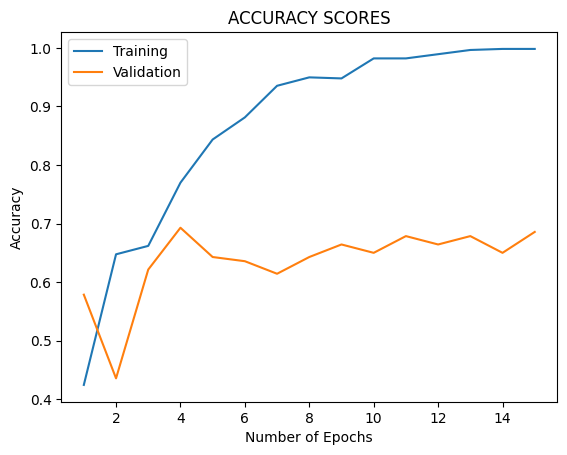

In [27]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=DeprecationWarning)


model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape = (128,128,3)),
    MaxPooling2D(pool_size=(2,2)) ,
    Flatten(),
    Dense(16,activation='relu'),
    Dense(4,activation = 'softmax')
    ])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train,steps_per_epoch=len(train),epochs=15,validation_data=validation,validation_steps=len(validation)    )
training = history.history['accuracy']
validate = history.history['val_accuracy']
epochs = range(1, len(training) + 1)
plt.plot(epochs, training , label='Training')
plt.plot(epochs, validate, label='Validation')
plt.title("ACCURACY SCORES")
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 916461327

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 9 steps
Epoch 1/15
35/35 [==============================] - 4s 115ms/step - loss: 1.3761 - accuracy: 0.3201 - val_loss: 1.2769 - val_accuracy: 0.4286
Epoch 2/15
35/35 [==============================] - 4s 112ms/step - loss: 1.1586 - accuracy: 0.4676 - val_loss: 1.0770 - val_accuracy: 0.5000
Epoch 3/15
35/35 [==============================] - 4s 118ms/step - loss: 0.9557 - accuracy: 0.5773 - val_loss: 1.1336 - val_accuracy: 0.5000
Epoch 4/15
35/35 [==============================] - 4s 118ms/step - loss: 0.8792 - accuracy: 0.6079 - val_loss: 0.9820 - val_accuracy: 0.5214
Epoch 5/15
35/35 [==============================] - 4s 113ms/step - loss: 0.6651 - accuracy: 0.6942 - val_loss: 0.9597 - val_accuracy: 0.5571
Epoch 6/15
35/35 [==============================] - 4s 113ms/step - loss: 0.5727 - accuracy: 0.7482 - val_loss: 1.0857 - val_accuracy: 0.5071
Epoch 7/15
35/35 [==============================] - 4s 11

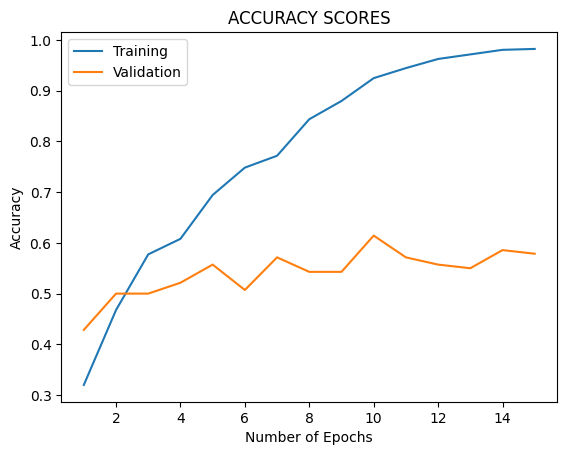

In [31]:
model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape = (128,128,3)),
    MaxPooling2D(pool_size=(2,2)) ,
    Flatten(),
    Dense(8,activation='relu'),
    Dense(4,activation = 'softmax')
    ])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train,steps_per_epoch=len(train),epochs=15,validation_data=validation,validation_steps=len(validation)    )
training = history.history['accuracy']
validate = history.history['val_accuracy']
epochs = range(1, len(training) + 1)
plt.plot(epochs, training , label='Training')
plt.plot(epochs, validate, label='Validation')
plt.title("ACCURACY SCORES")
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 9 steps
Epoch 1/15
35/35 [==============================] - 4s 114ms/step - loss: 1.7120 - accuracy: 0.3471 - val_loss: 1.2061 - val_accuracy: 0.4071
Epoch 2/15
35/35 [==============================] - 4s 121ms/step - loss: 1.1592 - accuracy: 0.4281 - val_loss: 1.1586 - val_accuracy: 0.4786
Epoch 3/15
35/35 [==============================] - 4s 116ms/step - loss: 0.9636 - accuracy: 0.6187 - val_loss: 1.2392 - val_accuracy: 0.5571
Epoch 4/15
35/35 [==============================] - 4s 120ms/step - loss: 0.7744 - accuracy: 0.7140 - val_loss: 0.9795 - val_accuracy: 0.5929
Epoch 5/15
35/35 [==============================] - 4s 116ms/step - loss: 0.6030 - accuracy: 0.7716 - val_loss: 0.9346 - val_accuracy: 0.6214
Epoch 6/15
35/35 [==============================] - 4s 111ms/step - loss: 0.4527 - accuracy: 0.8525 - val_loss: 0.8945 - val_accuracy: 0.6143
Epoch 7/15
35/35 [==============================] - 4s 12

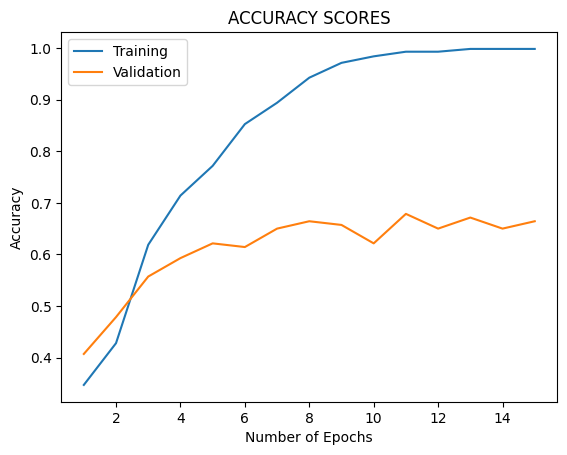

In [30]:
model=Sequential([
    Conv2D(8,(3,3),activation='relu',input_shape = (128,128,3)),
    MaxPooling2D(pool_size=(2,2)) ,
    Flatten(),
    Dense(32,activation='relu'),
    Dense(4,activation = 'softmax')
    ])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train,steps_per_epoch=len(train),epochs=15,validation_data=validation,validation_steps=len(validation)    )
training = history.history['accuracy']
validate = history.history['val_accuracy']
epochs = range(1, len(training) + 1)
plt.plot(epochs, training , label='Training')
plt.plot(epochs, validate, label='Validation')
plt.title("ACCURACY SCORES")
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
3 models are overfitting 
Model 1 generally outperforms Model 2,3 in terms of both training and validation accuracy.
model 3 is better than model 2.

In [ ]:
3 models are overfitting 
Model 1 generally outperforms Model 2,3 in terms of both training and validation accuracy.
model 3 is better than model 2.

References :         https://seaborn.pydata.org/generated/seaborn.heatmap.html
            http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/